# This notebook is the correction of this [notebook](https://github.com/spro/practical-pytorch/blob/master/char-rnn-generation/char-rnn-generation.ipynb)

In [11]:
import unidecode
import string 
import random 
import re 

import torch 
import torch.nn as nn
from torch.autograd import Variable

import time, math

import matplotlib.pyplot as plt 

### Prepare data

In [12]:
all_characters = string.printable
n_characters = len(all_characters)

data_path = "C:/Users/HomePC/Desktop/papers_implementation/Generating Sequences With Recurrent Neural Networks/data/william_shakepares.txt"
file = unidecode.unidecode(open(data_path).read())
file_len = len(file)
print('file_len =', file_len)

file_len = 1115394


In [13]:
chunk_len = 200

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

er Katharina! in your dumps?

KATHARINA:
Call you me daughter? now, I promise you
You have show'd a tender fatherly regard,
To wish me wed to one half lunatic;
A mad-cup ruffian and a swearing Jack,
Th


## Build the Model

In [14]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers

        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, inputs, hidden):
        inputs = self.encoder(inputs.view(1, -1))
        output, hidden = self.gru(inputs.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size)) 

### Inputs and Targets

In [15]:
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('Daniel'))

tensor([39, 10, 23, 18, 14, 21])


In [16]:
def random_training_set():
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

### Evaluating

In [17]:
def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str

    for p in range(len(prime_str) -1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]

    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)

        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]

        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)
    
    return predicted

### Training

In [18]:
def train(inp, target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)

        loss += criterion(output, target[c].unsqueeze(dim=0))

    loss.backward()
    decoder_optimizer.step()

    return loss.item() / chunk_len


def time_since(since):
    s = time.time() - since
    m = math.floor(s / 100)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [ ]:
n_epochs = 2000
print_every = 100
plot_every = 10
hidden_size = 100
n_layers = 1
lr = 0.005


decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()


start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*random_training_set())
    loss_avg += loss

    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

 28s (100 5%) 2.3513]
Wh?r a nold thousst, meand the youd sted nome, hes sthouns he seid thall sipice, so buty thour pather  

 62s (200 10%) 2.1685]
Whet the lented not lomt, wrens kis thou thou predow, stield ciriont onon purvere fupte paver the prer 



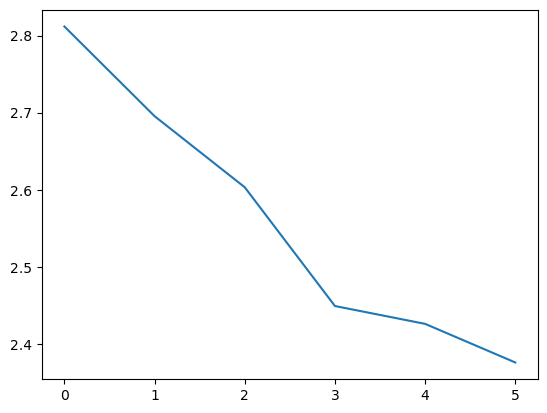

In [ ]:
plt.plot(all_losses)

In [10]:
print(evaluate('Th', 200, temperature=0.8))

Thand say fay condey the pretsune son and the moness carratience mine then their speechiend sear daughtens hand; then's from made
Your comes a and to keences the curse on there speak.

ANGLOUCESTES:
Whi


In [ ]:
print(evaluate('Th', 200, temperature=1.4))